In [1]:
import pandas as pd
import numpy as np

# import linear regression machine learning library
from sklearn.linear_model import LinearRegression

# importing ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
plt.style.use('classic')

%matplotlib inline


In [2]:
ads=pd.read_csv('Social_Network_Ads.csv')

In [3]:
ads_df=pd.DataFrame(ads)

In [4]:
ads_df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
ads_df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
ads_df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
ads_df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [8]:
ads_df = pd.get_dummies(ads_df, columns=['Gender'])

In [9]:
ads_df

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [10]:
ads_df=ads_df.drop('User ID',axis=1)

In [11]:
ads_df

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [12]:
ads_df.describe()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.510000,0.490000
std,10.482877,34096.960282,0.479864,0.500526,0.500526
min,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,1.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000,1.000000


In [13]:
ads_df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
Gender_Female      uint8
Gender_Male        uint8
dtype: object

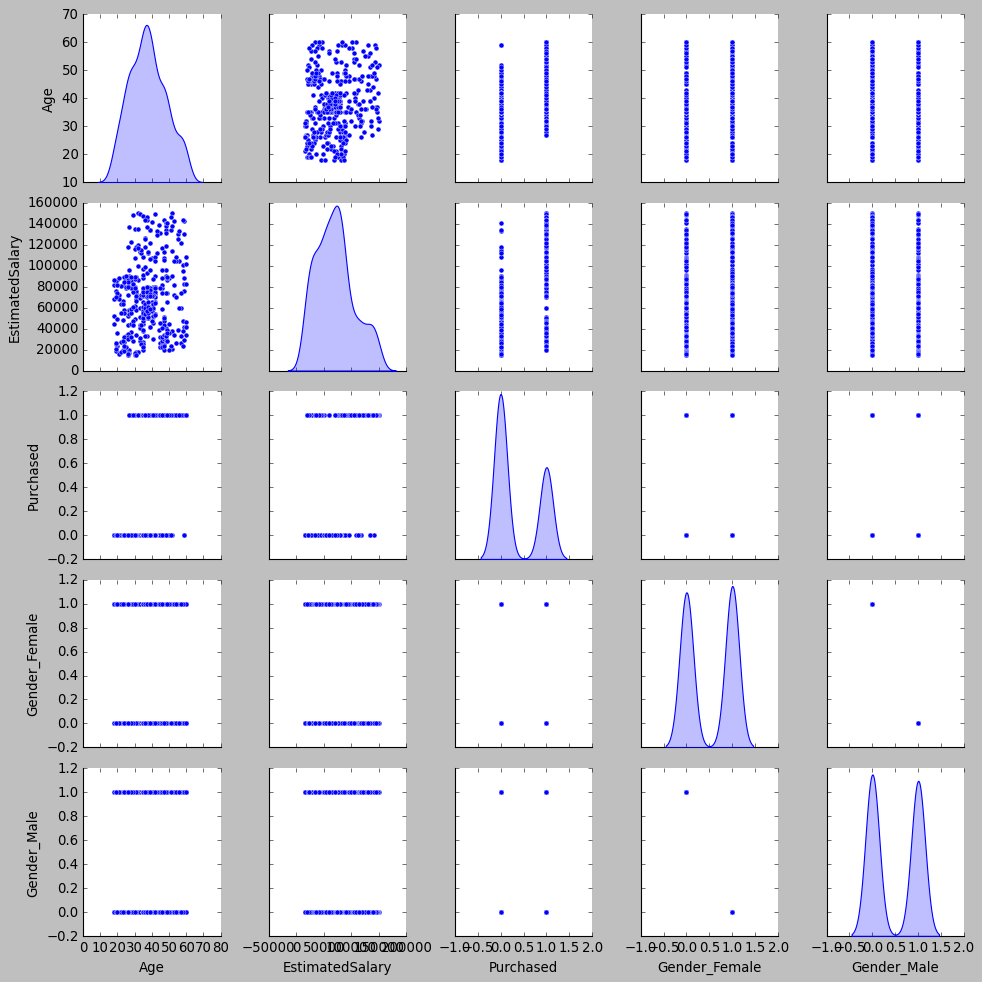

In [14]:
ads_df_attr = ads_df.iloc[:, 0:5]
#pairgrid

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig()

sns.pairplot(ads_df_attr, diag_kind='kde')  

In [15]:
X =ads_df[['Age','EstimatedSalary','Gender_Female','Gender_Male']]
y=ads_df[['Purchased']]

In [16]:
from sklearn.model_selection import train_test_split
# split X and y into training and test set in 75:25 ratio 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [17]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [18]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is 0.025097506437761076
The coefficient for EstimatedSalary is 4.539831451206132e-06
The coefficient for Gender_Female is -0.0034500604986416362
The coefficient for Gender_Male is 0.003450060498641636


In [19]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.9053149203392375


In [20]:
regression_model.score(X_train, y_train)

0.4713164168085454

In [21]:
regression_model.score(X_test, y_test)

0.41923090127949836

In [22]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()


,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased
39,27,31000,1,0,0
167,35,71000,1,0,0
383,49,28000,0,1,1
221,35,91000,0,1,1
351,37,75000,0,1,0


In [23]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Purchased~ Age+EstimatedSalary+Gender_Female+Gender_Male', data = data_train).fit()
lm1.params

Intercept         -0.603543
Age                0.025098
EstimatedSalary    0.000005
Gender_Female     -0.305222
Gender_Male       -0.298322
dtype: float64

In [24]:
print(lm1.summary()) 

                            OLS Regression Results                            
Dep. Variable:              Purchased   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     82.02
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           5.79e-38
Time:                        19:26:48   Log-Likelihood:                -98.723
No. Observations:                 280   AIC:                             205.4
Df Residuals:                     276   BIC:                             220.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6035      0.055    -

In [25]:
mse = np.mean((regression_model.predict(X_test) - y_test)**2)

D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [26]:
import math

math.sqrt(mse)

0.3733424482869855

In [27]:
y_pred = regression_model.predict(X_test)

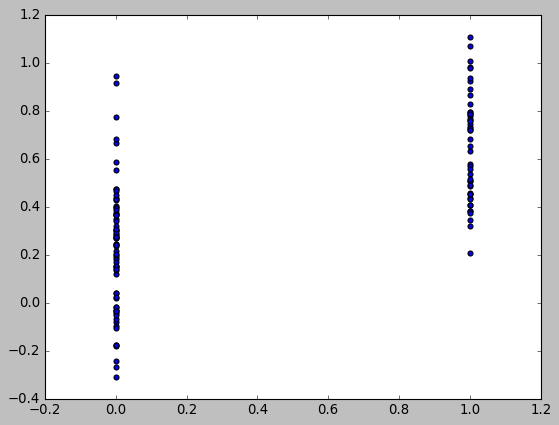

In [28]:
plt.scatter(y_test['Purchased'], y_pred)